In [703]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [704]:
df = pd.read_csv('water_potability.csv')
df.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


The water_potability.csv file contains water quality metrics for 3276 different water bodies.  The main task that came with this dataset was to predict if the water is safe for human consumption based on some measured parameters.  However, I want to investigate if we can predict the conductivity of a water based on the other measured parameters via a multilinear regression analysis.  A model like this one can be used in future to verify the intergrity or validity of our analytical results.  This data was obtained from kaggle.com.

In [705]:
# Checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
ph                 2785 non-null float64
Hardness           3276 non-null float64
Solids             3276 non-null float64
Chloramines        3276 non-null float64
Sulfate            2495 non-null float64
Conductivity       3276 non-null float64
Organic_carbon     3276 non-null float64
Trihalomethanes    3114 non-null float64
Turbidity          3276 non-null float64
Potability         3276 non-null int64
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [706]:
# High level statistical overview of the data

df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [707]:
# Lets also drop the "Potability" column since its not our target for this model
df=df.drop('Potability', axis=1)

In [708]:
# lets checkout the percentage of missing values for the predictors

100*df.isnull().sum()/len(df)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
dtype: float64

23% of sulfate data is missing and so if we drop our missing values then we will lose a big percentage of our data. Lets check if there is any good correlation between other predictors and "Sulfate" so that we can confidently attempt to fill the missing Sulfate values by the mean sulfate values grouped by the highly correlated predictors observations.

In [709]:
df.corr()['Sulfate']

ph                 0.018203
Hardness          -0.106923
Solids            -0.171804
Chloramines        0.027244
Sulfate            1.000000
Conductivity      -0.016121
Organic_carbon     0.030831
Trihalomethanes   -0.030274
Turbidity         -0.011187
Name: Sulfate, dtype: float64

None of these correlations are high enough and so its better we drop the Sulfate.

In [710]:
#drop Sulfate column

df=df.drop('Sulfate', axis=1)

In [711]:
# Lets check if pH (14% missing values) is well correlated with any of the predictors

df.corr()['ph']

ph                 1.000000
Hardness           0.082096
Solids            -0.089288
Chloramines       -0.034350
Conductivity       0.018614
Organic_carbon     0.043503
Trihalomethanes    0.003354
Turbidity         -0.039057
Name: ph, dtype: float64

None of these correlations are high enough

In [712]:
# Lets check if Trihalomethanes (5% missing values) is well correlated with any of the predictors

df.corr()['Trihalomethanes']

ph                 0.003354
Hardness          -0.013013
Solids            -0.009143
Chloramines        0.017084
Conductivity       0.001285
Organic_carbon    -0.013274
Trihalomethanes    1.000000
Turbidity         -0.022145
Name: Trihalomethanes, dtype: float64

None of the corr values are high enough

In [713]:
# Lets drop all the missing rows

df = df.dropna()
df = df.reset_index(drop=True)

In [714]:
# Checking for any more missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 8 columns):
ph                 2649 non-null float64
Hardness           2649 non-null float64
Solids             2649 non-null float64
Chloramines        2649 non-null float64
Conductivity       2649 non-null float64
Organic_carbon     2649 non-null float64
Trihalomethanes    2649 non-null float64
Turbidity          2649 non-null float64
dtypes: float64(8)
memory usage: 165.7 KB


No more missing values

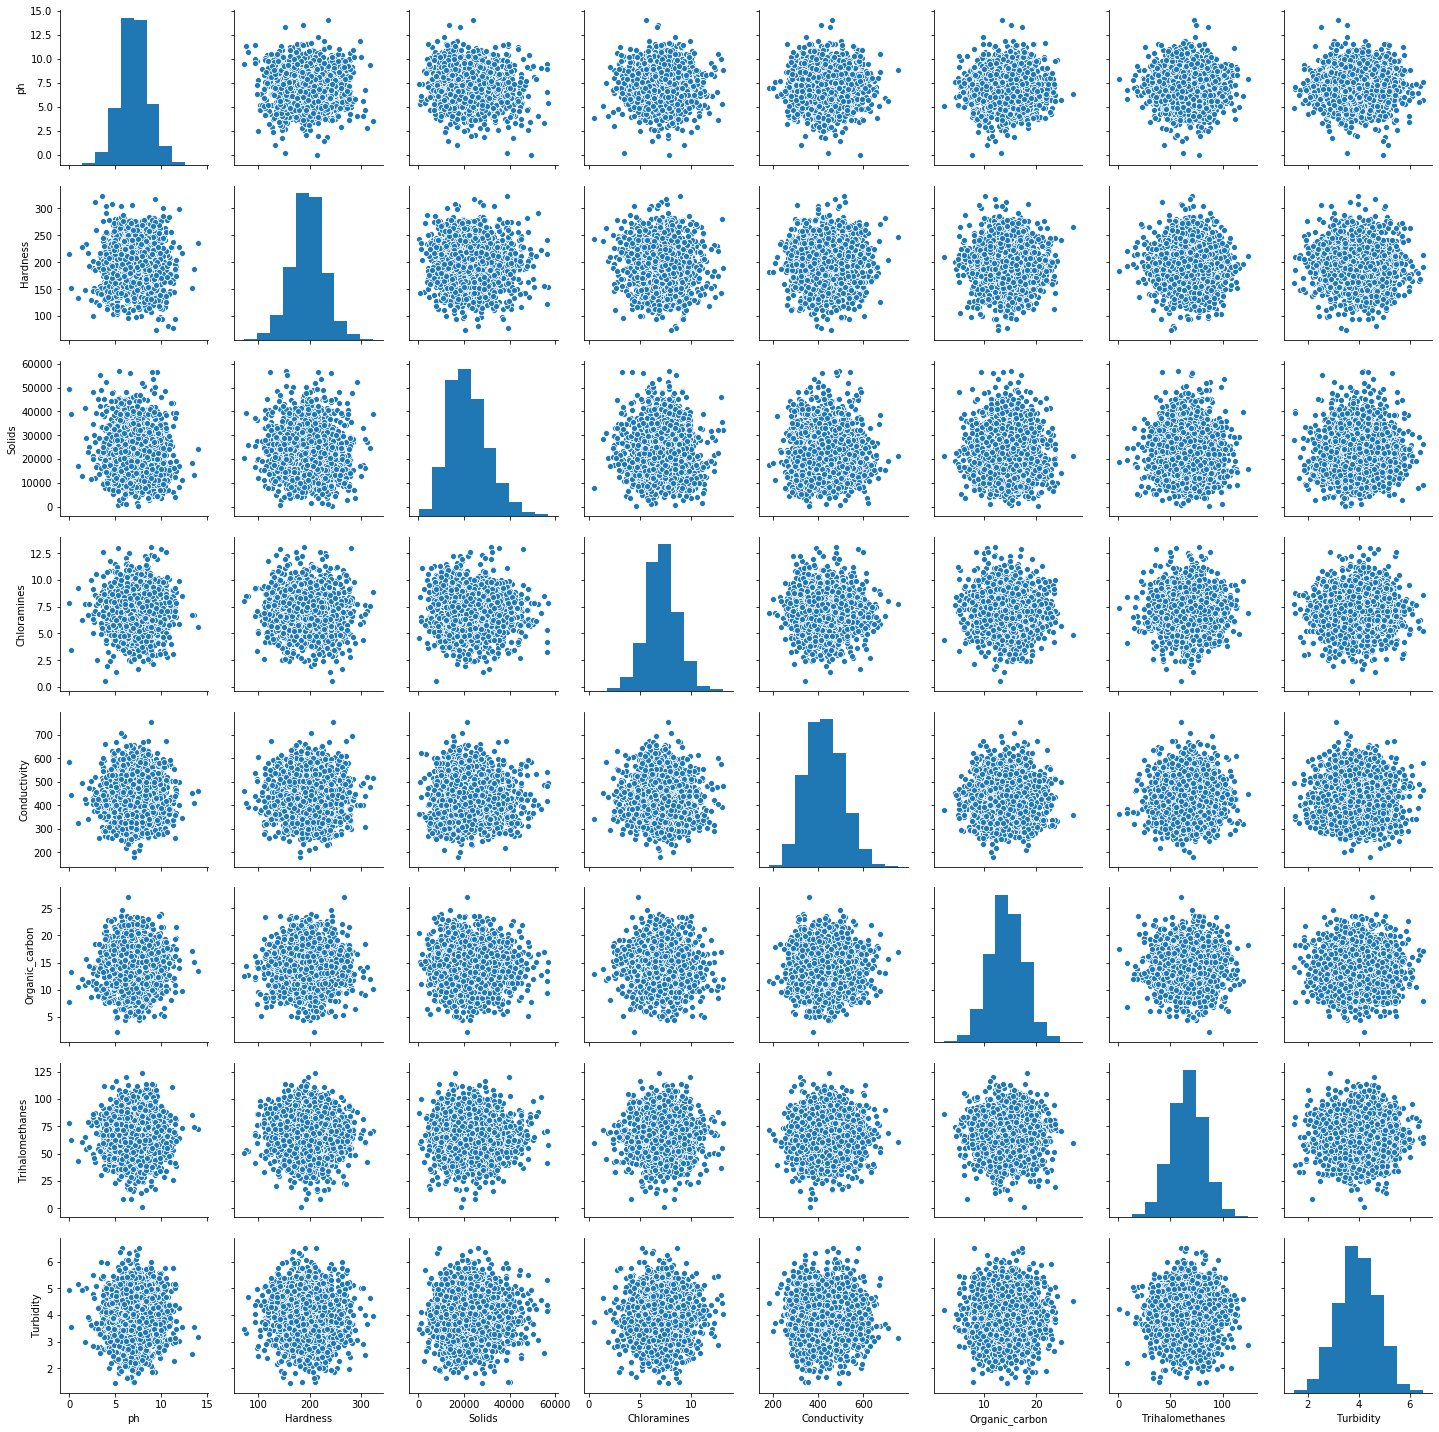

In [715]:
# Let's explore the data further

sns.pairplot(data=df)
plt.show()

No clear linear relationships here. I was at least expecting some sort of strong correlation between the Total Dissolved Solids ("Solids") and the "Conductivity". I was expecting it to be so strong that they will cause multicollinearity problems.

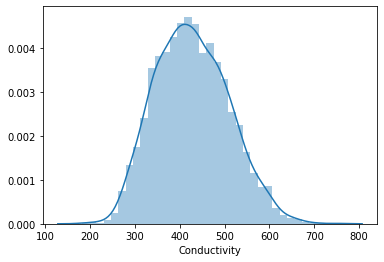

0.2602445196856723

In [716]:
# Visualizing the distribution of our target column

sns.distplot(df['Conductivity'])
plt.show()
df['Conductivity'].skew()

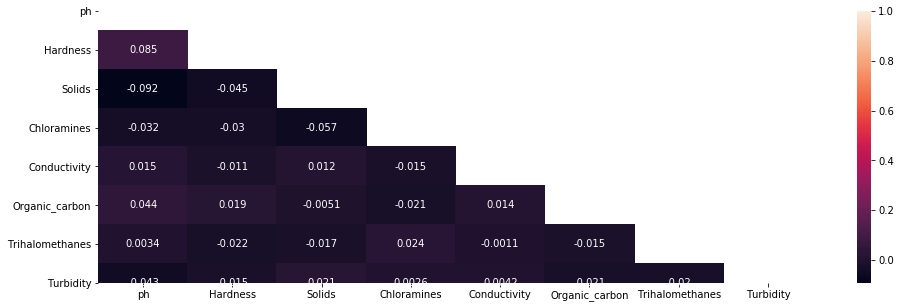

In [717]:
# Heatmap to check for any high correlations

hide = np.zeros_like(df.corr())
top_triangle=np.triu_indices_from(hide)
hide[top_triangle] = True

plt.figure(figsize=(16,5))
sns.heatmap(df.corr(), annot=True, mask=hide)

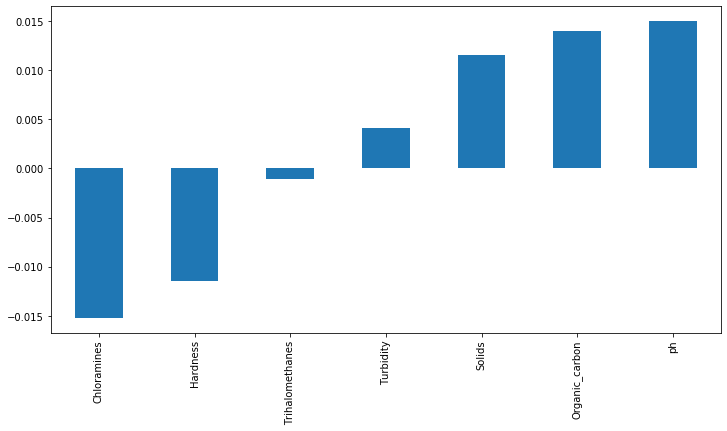

In [718]:
# Lets visualize the correlations even further

plt.figure(figsize=(12,6))
df.corr()['Conductivity'].sort_values().drop('Conductivity').plot(kind='bar')

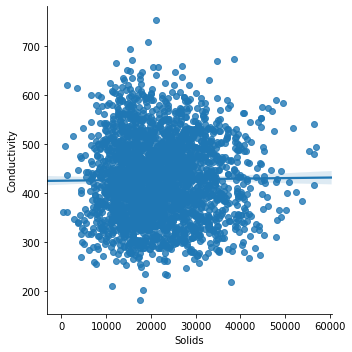

In [719]:
#Lets visualize the linear relationship between "Hardness" and "Conductivity"

sns.lmplot(data=df, x= 'Solids', y='Conductivity')

## Multivariable Regression

In [720]:
# Dividing the independent and dependent variables

X = df.drop('Conductivity', axis = 1)
y = df['Conductivity']


In [721]:
# Performing the train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [722]:
# Importing the linear model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [723]:
# Lets  train our model and see the coefficients
lm.fit(X_train, y_train)
print('Intercept', lm.intercept_)
pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=['coef'])

Intercept 417.904426598723


,coef
ph,0.044390
Hardness,0.026854
Solids,0.000176
Chloramines,-1.569131
Organic_carbon,0.862176
Trihalomethanes,0.025484
Turbidity,-0.367507


Looks like the total organic carbon and the chloramines have the strongest coeeficients.  I expect the pH to be insignificant becaues the pH could go high or low depending on the dominant dissolved species contributing to the conductivity. We will explore the significance of the above predictors later.

In [724]:
# Lets take a look at the R-squared

print('R-squared for training data', lm.score(X_train, y_train))
print('R-Squared for test data', lm.score(X_test, y_test))


R-squared for training data 0.0027836715327170807
R-Squared for test data -0.011480608103482837


In [725]:
# Let's use statsmodel since its easier for the evaluations I want to do from here onwards

X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)
results = model.fit()

results.summary()

D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Conductivity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7361
Date:                Sat, 23 Oct 2021   Prob (F-statistic):              0.641
Time:                        20:17:59   Log-Likelihood:                -10793.
No. Observations:                1854   AIC:                         2.160e+04
Df Residuals:                    1846   BIC:                         2.165e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             417.9044     23.304     17.933      0.000     372.200     463.609
ph                  0.0444      1.216      0.036      0.971      -2.341       2.430
Hardness            0.0269      0.059      0.459      0.646      -0.088       0.142
Solids              0.0002      0.000      0.798      0.425      -0.000       0.001
Chloramines        -1.5691      1.178     -1.332      0.183      -3.879       0.741
Organic_carbon      0.8622      0.583      1.478      0.139      -0.282       2.006
Trihalomethanes     0.0255      0.119      0.215      0.830      -0.207       0.258
Turbidity          -0.3675      2.418     -0.152      0.879      -5.110       4.375
==============================================================================
Omnibus:                       27.246   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.459
Skew:                           0.214   Prob(JB):                     8.05e-06
Kurtosis:                       2.652   Cond. No.                     2.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The condition index is too strong signalling a possible problem with multicolinearity issues


In [726]:
X_with_constant = sm.add_constant(X_train)
X_with_constant = X_with_constant.drop(['Solids'], axis = 1)
model = sm.OLS(y_train, X_with_constant)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Conductivity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7528
Date:                Sat, 23 Oct 2021   Prob (F-statistic):              0.607
Time:                        20:17:59   Log-Likelihood:                -10793.
No. Observations:                1854   AIC:                         2.160e+04
Df Residuals:                    1847   BIC:                         2.164e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             423.1783     22.345     18.938      0.000     379.354     467.002
ph                 -0.0233      1.213     -0.019      0.985      -2.403       2.356
Hardness            0.0233      0.058      0.399      0.690      -0.091       0.138
Chloramines        -1.6370      1.175     -1.394      0.164      -3.941       0.667
Organic_carbon      0.8714      0.583      1.495      0.135      -0.272       2.015
Trihalomethanes     0.0240      0.119      0.202      0.840      -0.209       0.257
Turbidity          -0.3118      2.417     -0.129      0.897      -5.052       4.428
==============================================================================
Omnibus:                       27.941   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.710
Skew:                           0.212   Prob(JB):                     7.10e-06
Kurtosis:                       2.642   Cond. No.                     2.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [727]:
#Let me create a LASSO regresssor, forcing zero coefficients
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=.3)
lasso.fit(X_train, y_train)
lasso_coeff = pd.DataFrame(data=lasso.coef_, index= X_train.columns, columns=['coeff'])
lasso_coeff

,coeff
ph,0.000000
Hardness,0.027156
Solids,0.000176
Chloramines,-1.461167
Organic_carbon,0.836072
Trihalomethanes,0.024644
Turbidity,-0.000000


In [728]:
# Now Let's rerun the model only with the important factors!
X_with_constant = sm.add_constant(X_train)
X_with_constant = X_with_constant.drop(['ph','Turbidity', 'Solids'], axis = 1)
model = sm.OLS(y_train, X_with_constant)
results = model.fit()

results.summary()

D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Conductivity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.126
Date:                Sat, 23 Oct 2021   Prob (F-statistic):              0.342
Time:                        20:17:59   Log-Likelihood:                -10793.
No. Observations:                1854   AIC:                         2.160e+04
Df Residuals:                    1849   BIC:                         2.162e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             421.7809     18.514     22.782      0.000     385.470     458.092
Hardness            0.0232      0.058      0.400      0.689      -0.091       0.137
Chloramines        -1.6388      1.172     -1.398      0.162      -3.938       0.660
Organic_carbon      0.8706      0.581      1.498      0.134      -0.269       2.011
Trihalomethanes     0.0243      0.119      0.205      0.838      -0.208       0.257
==============================================================================
Omnibus:                       27.762   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.582
Skew:                           0.211   Prob(JB):                     7.57e-06
Kurtosis:                       2.644   Cond. No.                     2.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Slight improvement in the model. Lets drop all coefficients below 0.05

In [729]:
# Dropping more features
X_with_constant = sm.add_constant(X_train)
X_with_constant = X_with_constant.drop(['ph','Turbidity', 'Solids', 'Hardness', 'Trihalomethanes'], axis = 1)
model = sm.OLS(y_train, X_with_constant)
results = model.fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Conductivity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.154
Date:                Sat, 23 Oct 2021   Prob (F-statistic):              0.116
Time:                        20:17:59   Log-Likelihood:                -10793.
No. Observations:                1854   AIC:                         2.159e+04
Df Residuals:                    1851   BIC:                         2.161e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            428.0569     11.953     35.811      0.000     404.614     451.500
Chloramines       -1.6585      1.171     -1.417      0.157      -3.954       0.637
Organic_carbon     0.8739      0.581      1.504      0.133      -0.265       2.013
==============================================================================
Omnibus:                       27.725   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.596
Skew:                           0.212   Prob(JB):                     7.52e-06
Kurtosis:                       2.645   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

More improvement in the model. The adjusted R-squared has improved slightly. The Condition Index has improved significantly but its still high. It makes sense for the chloramines to have high collinearity issue with the Organic _carbon since the chloramines kills organic contaminants. 


In [730]:
#Modified model: Transformed using logged models without "Hardnes"
X = df[[ 'Chloramines','Organic_carbon']]
y = df['Conductivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print('Intercept', lm.intercept_)
pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=['coef'])


Intercept 428.0569222954475


,coef
Chloramines,-1.658495
Organic_carbon,0.873927


In [731]:
# Lets take a look at the R-squared

print('R-squared for training data', lm.score(X_train, y_train))
print('R-Squared for test data', lm.score(X_test, y_test))

R-squared for training data 0.0023222751301770206
R-Squared for test data -0.009219908258032206


The R-squared for the test data improved from the initial -0.0114

## Predictions

In [732]:
predictions = lm .predict(X_test)

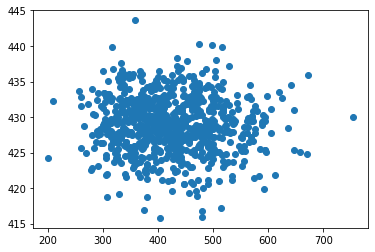

In [737]:
# Let's visualize predictions vs the test data

plt.scatter(y_test, predictions)

Not a great model but we did our best with the data we had

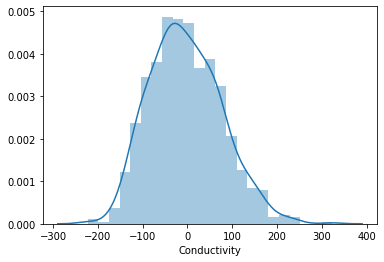

In [734]:
# Let's check the distribution of our residuals to confirm if we used the right model
sns.distplot(y_test-predictions)

Looks like the resduals are normally distributed and so we chose the right model.

In [735]:
# Lets evaluate our model further
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 79.83052976110399
